# <span style="font-size:0"></span><div style="padding:1.5rem;color:white;margin:10;font-size:2rem;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#1f89e3"><b><span style='color:#FFFFFF'>1 |</span> Understand</b></div> 

[Project brief]

In [1]:
# Load The Data

import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Tools
import locale


df = pd.read_csv('./Assets/kc_house_data.csv')

target_attribute = "price"

# Pop the column from the DataFrame
column = df.pop(target_attribute)

# Append the column back to the DataFrame - this way it's at the end. 
df[target_attribute] = column

list_of_columns = df.columns.values.tolist()
print(list_of_columns)

['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'price']


## <b><span style='color:#1f89e3'> 1.1 |</span> Data Dictionary</b>
Some small snippet explaining what the table is representing.




<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>Attribute Name</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>date</td>
      <td>Date of the home sale</td>
    </tr>
    <tr>
      <td>bedrooms</td>
      <td>Number of bedrooms</td>
    </tr>
    <tr>
      <td>bathrooms</td>
      <td>Number of bathrooms</td>
    </tr>
    <tr>
      <td>sqft_living</td>
      <td>How many square feet of living space there is.</td>
    </tr>
    <tr>
      <td>sqft_lot</td>
      <td>How large the lot is in square feet</td>
    </tr>
    <tr>
      <td>floors</td>
      <td>How many floors there are</td>
    </tr>
    <tr>
      <td>waterfront</td>
      <td>A boolean if the property is waterfront or not.</td>
    </tr>
    <tr>
      <td>view</td>
      <td>A numeric ordinal scale (0-4) of how good the view is. 4 being the best </td>
    </tr>
    <tr>
      <td>condition</td>
      <td>A numeric ordinal scale (1-5) of how good condition the place is. 5 being the best.</td>
    </tr>
    <tr>
      <td>grade</td>
      <td>An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design</td>
    </tr>
    <tr>
      <td>sqft_above</td>
      <td>The square footage of the interior housing space that is above ground level</td>
    </tr>
    <tr>
      <td>sqft_basement</td>
      <td>The square footage of the interior housing space that is below ground level</td>
    </tr>
    <tr>
      <td>sqft_basement</td>
      <td>The square footage of the interior housing space that is below ground level</td>
    </tr>
    <tr>
      <td>yr_built</td>
      <td>Year when the house was built</td>
    </tr>
    <tr>
      <td>yr_renovated</td>
      <td>Year when the house was last renovated</td>
    </tr>
    <tr>
      <td>zipcode</td>
      <td>What zipcode the house is in.</td>
    </tr>
    <tr>
      <td>long & lat</td>
      <td>Coordinates of the house.</td>
    </tr>
    <tr>
      <td>long & lat</td>
      <td>Coordinates of the house.</td>
    </tr>
    <tr>
      <td>sqft_living15</td>
      <td>The square footage of interior housing living space for the nearest 15 neighbors</td>
    </tr>
    <tr>
      <td>sqft_lot15</td>
      <td>The square footage of the land lots of the nearest 15 neighbors</td>
    </tr>
    <tr>
      <td>Price</td>
      <td>How much the house costs - also our target variable!</td>
    </tr>
  </tbody>
</table>

## <b><span style='color:#1f89e3'> 1.2 | </span>Preview Dataframe</b>

In [2]:
df

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,10/13/2014,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900.0
1,6414100192,12/9/2014,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000.0
2,5631500400,2/25/2015,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000.0
3,2487200875,12/9/2014,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000.0
4,1954400510,2/18/2015,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,3,2.50,1530,1131,3.0,0,0,3,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000.0
21593,6600060120,2/23/2015,4,2.50,2310,5813,2.0,0,0,3,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000.0
21594,1523300141,6/23/2014,2,0.75,1020,1350,2.0,0,0,3,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101.0
21595,291310100,1/16/2015,3,2.50,1600,2388,2.0,0,0,3,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000.0


<img src='./Assets/Attribute Summary.png' />

<img src='./Assets/Map Summary.png' />

# <span style="font-size:0"></span><div style="padding:1.5rem;color:white;margin:10;font-size:2rem;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#1f89e3"><b><span style='color:#FFFFFF'>2 |</span> Clean</b></div> 

The better the data represents what it intended to capture, the better the results. Focusing on clean data and the natural integrity it provides also yields the highest quality information, best represents the truth, and empowers you with better overall decision making, ability to learn about something, or just the capacity to work more easily discover something we’re trying to improve. 

Whereas dirty data is incorrect, missing, outdated, inconsistent, irrelevant, improperly formatted, possibly containing duplicated which effects true numeric aggregations, any anything else that lowers the dependability of the information. Without reliable data integrity, we can’t trust results that derive from it.

## <b><span style='color:#1f89e3'> 2.1 | </span>Relevancy</b>
Filtering data or dropping columns that’s not relevant to the project. Also archive outdated data if applicable.

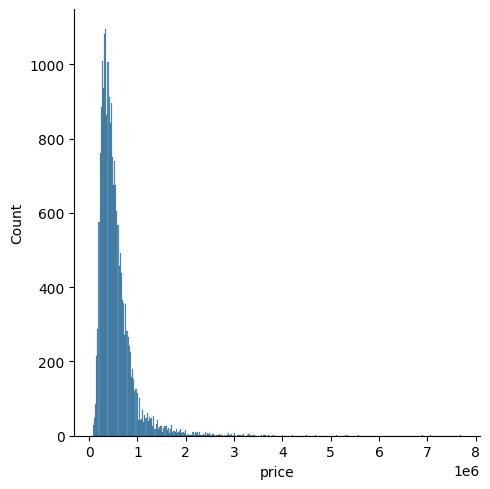

In [3]:
sns.displot(df['price'])

<div class="alert alert-block alert-warning">
    <b>Warning:</b> It's unrealistic to train on extreme outliers like mega mansions that go for multiple millions of dollars. Let's add an easy to configure filter.
</div>

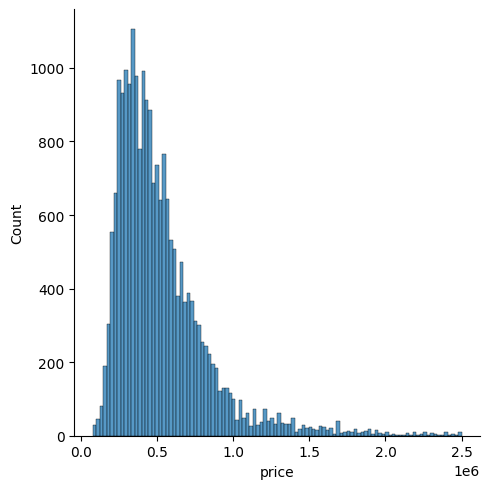

In [4]:
# Specify the threshold. If you want to be more strict, you can limit to around 1 million. Depends on the context you're going for.
condition = df['price'] <= 2500000

# Use boolean indexing to filter the DataFrame
df = df[condition]

sns.displot(df['price'])

<div class="alert alert-block alert-info">
    <b>Better Representation:</b> Even though there is still a skew, it's much more acceptable and won't harm future training.
</div>

## <b><span style='color:#1f89e3'> 2.2 | </span>Completeness</b>

Handling missing data / null values. Often it’s either random, specific, or at some range. If there’s too much data missing, be sure to acknowledge that in your findings to whoever you’re presenting findings to. 


In [5]:
# Missing data in terms of percentages for each attribute.
threshold = 0

missing = ((df.isnull().sum() / len(df)) * 100).round(2)
filtered = missing[missing > threshold].reset_index()
filtered.columns = ['Attribute', 'Missing Percentage']

# Format and sort the DataFrame
filtered['Missing Percentage'] = filtered['Missing Percentage'].apply(lambda x: f"{x:.2f}%")
empties_df = filtered.sort_values(by='Missing Percentage').style.hide()

# Check if the underlying DataFrame is empty
if len(empties_df.data) == 0:
    print("No empties!")
else:
    empties_df
    sns.heatmap(df.isnull(), yticklabels=False,cbar=False,cmap='plasma')


No empties!


<div class="alert alert-block alert-info">
    <b>No action needed:</b> Nice, No missing data.
</div>

## <b><span style='color:#1f89e3'> 2.3 | </span>Validity</b>
Remove duplicates, address outliers, and check for contextual validity.

In [6]:
duplicates = df[df.duplicated()]

if len(duplicates) == 0:
    print("No duplicates!")
else:
    duplicates

No duplicates!


<div class="alert alert-block alert-info">
    <b>No action needed:</b> Looking at the excel file and df.head() showed us everything is valid. So, we don't need to take any actions.
</div>

## <b><span style='color:#1f89e3'> 2.4 | </span>Consistent</b>

Formatting of data types & structures. Maintaining consistent units of measure too. So, developing or choosing a standard to consistently stick with is important.

<div class="alert alert-block alert-info">
    <b>No action needed:</b> Same as before. Our data is in good shape.
</div>

## <b><span style='color:#1f89e3'> 2.5 | </span>Accurate</b>

Fix or remove incorrect data and review contextual accuracy.

Examples
 - Text: Fix misspellings, remove white spaces
 - Dates: Fix formats and truncation
 - Numbers: Correct data type if you haven’t done so yet. Correct ranges. 

In [7]:
df.loc[:, 'date'] = pd.to_datetime(df['date'])


<div class="alert alert-block alert-info">
    <b>No action needed:</b> Upon looking at the excel sheet, we know everything is in order. 
</div>

<div class="alert alert-block alert-success">
    <b>All set:</b> Yay, the data is all clean!
</div>

# <span style="font-size:0"></span><div style="padding:1.5rem;color:white;margin:10;font-size:2rem;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#1f89e3"><b><span style='color:#FFFFFF'>3 |</span> Analyze</b></div> 
Mastering numpy and pandas will be critical to make attribute engineering easier. 

## <b><span style='color:#1f89e3'> 3.1 | </span>Intro</b>

<Axes: xlabel='long', ylabel='lat'>

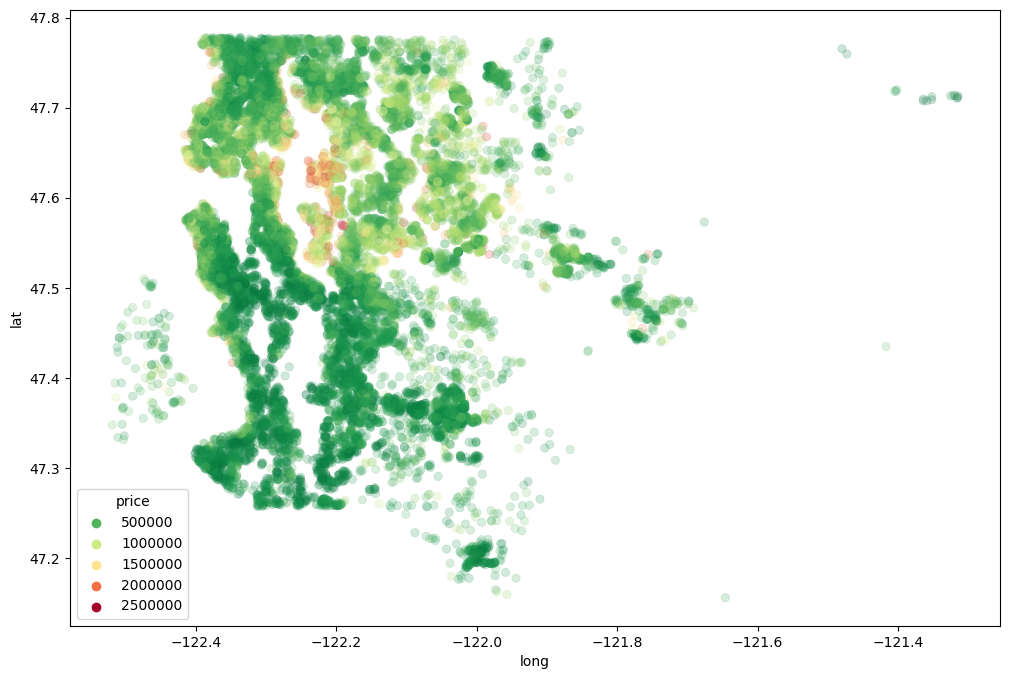

In [8]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',
                data=df,hue='price',
                palette='RdYlGn_r',edgecolor=None,alpha=0.2)

## <b><span style='color:#1f89e3'> 3.2 | </span>Metrics</b>

In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21500.0,4.581083e+09,2.876656e+09,1.000102e+06,2.123049e+09,3.904940e+09,7.308950e+09,9.900000e+09
bedrooms,21500.0,3.368140e+00,9.230392e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21500.0,2.106779e+00,7.550718e-01,5.000000e-01,1.500000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21500.0,2.064451e+03,8.825975e+02,3.700000e+02,1.420000e+03,1.910000e+03,2.540000e+03,1.354000e+04
sqft_lot,21500.0,1.506618e+04,4.148867e+04,5.200000e+02,5.040000e+03,7.600000e+03,1.060225e+04,1.651359e+06
floors,21500.0,1.492256e+00,5.391963e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21500.0,6.046512e-03,7.752568e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21500.0,2.250233e-01,7.468350e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21500.0,3.409395e+00,6.501851e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00
grade,21500.0,7.642512e+00,1.151049e+00,3.000000e+00,7.000000e+00,7.000000e+00,8.000000e+00,1.300000e+01


## <b><span style='color:#1f89e3'> 3.3 | </span>Composition</b>

In [10]:
import plotly.express as px

# Create a list of categorical variables you want to plot
categorical_variables = ['grade', 'condition', 'view', 'zipcode']

# Loop through each categorical variable and create a treemap
for variable in categorical_variables:
    avg_prices = df.groupby(variable)['price'].mean().reset_index()
    avg_prices = avg_prices.rename(columns={'price': 'Average_Price'})
    
    # Create the treemap
    fig = px.treemap(avg_prices, path=[variable], values="Average_Price", title=f'Treemap for {variable}')
    
    # Show the treemap
    fig.show()


## <b><span style='color:#1f89e3'> 3.4 | </span>Distribution</b>

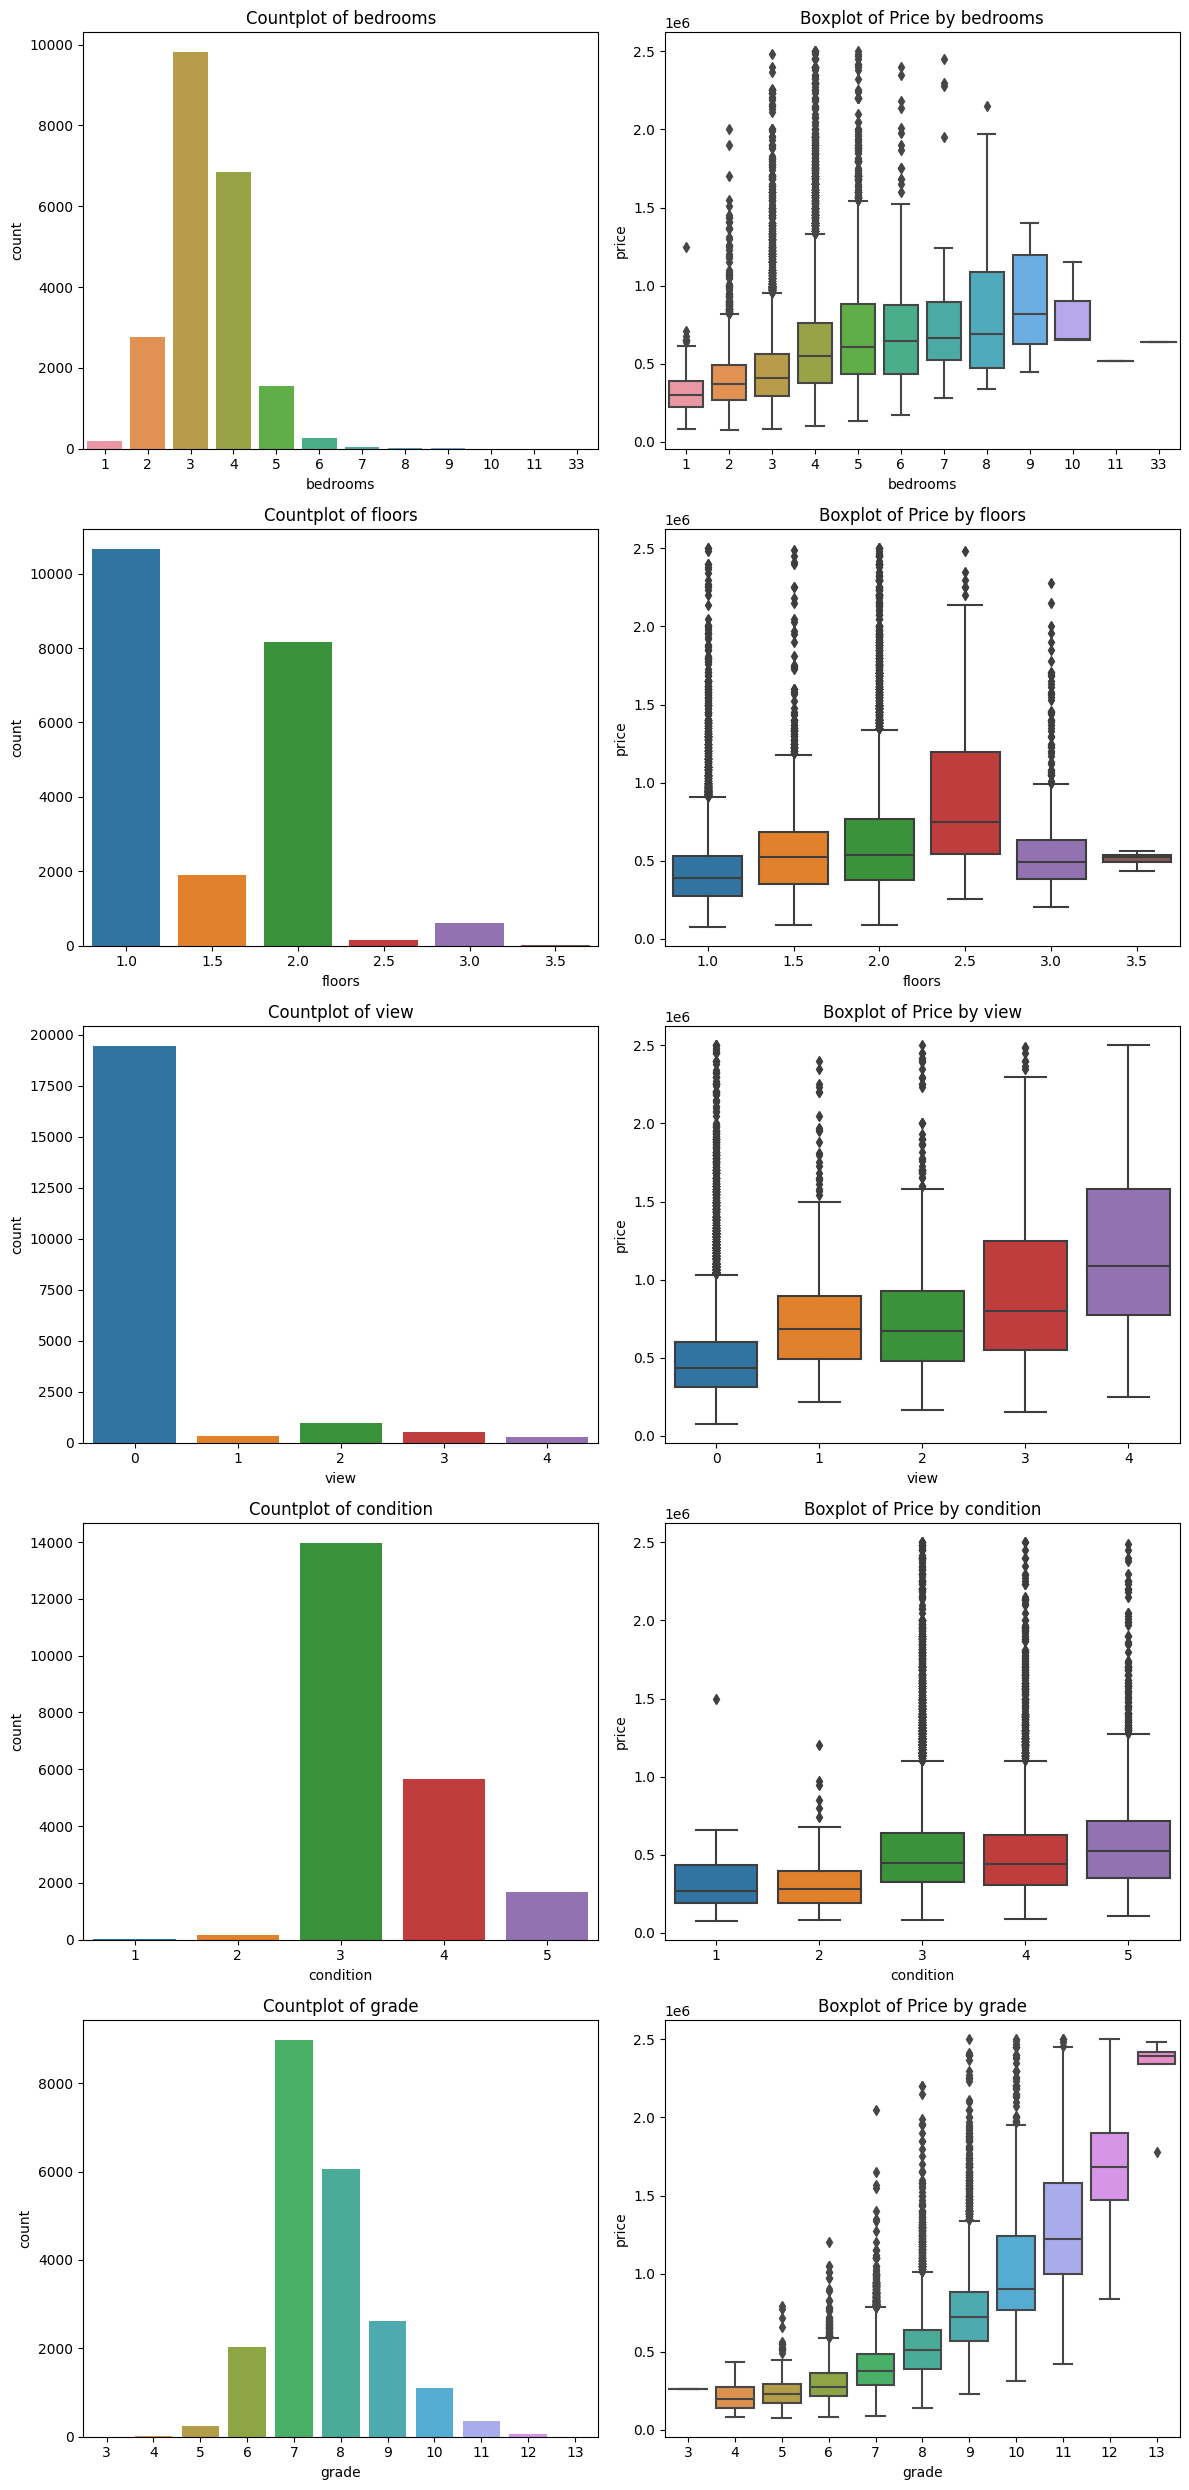

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of dimensions you want to plot
dimensions = ['bedrooms', 'floors', 'view', 'condition', 'grade']

# Create a figure with subplots for each measure pair
num_measures = len(dimensions)
fig, axes = plt.subplots(num_measures, 2, figsize=(12, 5 * num_measures))

# Iterate through the dimensions and create pairs of countplots and boxplots
for i, measure in enumerate(dimensions):
    # Plot the countplot on the left subplot of the current row
    sns.countplot(x=measure, data=df, ax=axes[i, 0])
    axes[i, 0].set_title(f'Countplot of {measure}')
    
    # Plot the boxplot on the right subplot of the current row
    sns.boxplot(x=measure, y=target_attribute, data=df, ax=axes[i, 1])
    axes[i, 1].set_title(f'Boxplot of Price by {measure}')

# Adjust the layout to prevent overlapping titles
plt.tight_layout()

# Show the plots
plt.show()


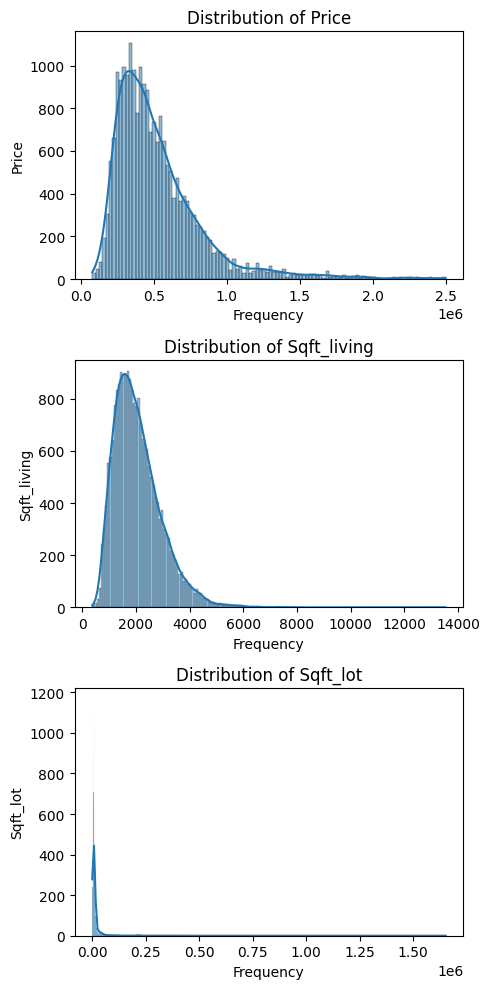

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of variables for which you want to create distribution plots
variables = ['price', 'sqft_living', 'sqft_lot']

# Set the figure size

# Create a figure and a grid of subplots with a vertical layout
fig, axes = plt.subplots(len(variables), 1, figsize=(5, 10))

# Loop through the variables and create vertical distribution plots
for i, variable in enumerate(variables):
    sns.histplot(data=df[variable], kde=True, ax=axes[i], orientation='vertical')  # Vertical orientation
    axes[i].set_title(f'Distribution of {variable.capitalize()}')
    axes[i].set_xlabel('Frequency')
    axes[i].set_ylabel(variable.capitalize())

# Adjust spacing between subplots
plt.tight_layout()

# Show the subplots
plt.show()


## <b><span style='color:#1f89e3'> 3.5 | </span>Relationships</b>

In [13]:
# sns.pairplot(df)

<Axes: >

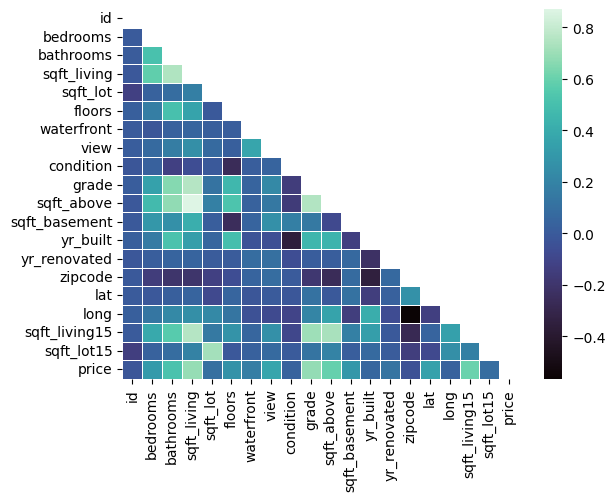

In [14]:
# Create a correlation matrix for numeric columns in the DataFrame
corr_matrix = df.corr(numeric_only=True)

# Create a mask to hide the upper triangle of the correlation matrix
mask = np.triu(np.ones_like(corr_matrix))

# Color Options
diverging_cmap = 'coolwarm'
zero_continous_cmap = 'mako'

# Plot a heatmap of the correlation matrix with the mask
sns.heatmap(corr_matrix, linewidths=0.5, mask=mask, cmap=zero_continous_cmap, annot=False)

<Axes: >

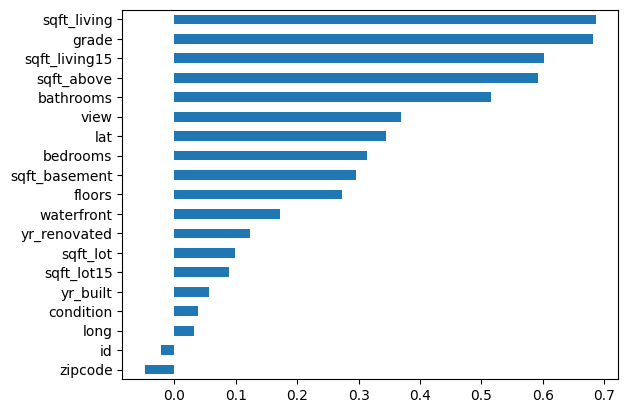

In [15]:
df.corr(numeric_only=True)["price"].sort_values()[:-1].plot(kind='barh')

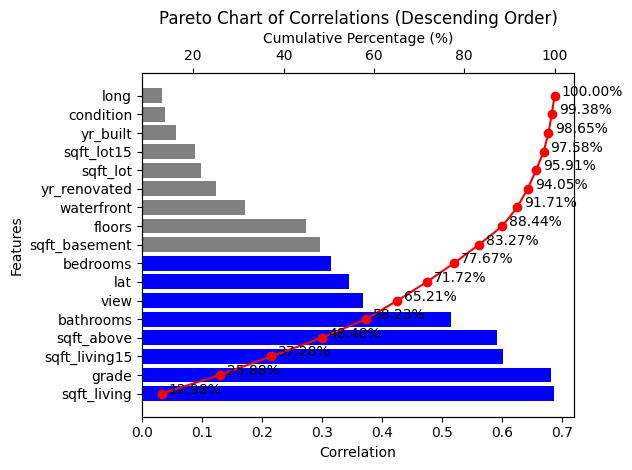

In [16]:
import pandas as pd
import matplotlib.pyplot as plt


# Calculate correlations
correlations = df.corr(numeric_only=True)["price"].sort_values()[2:-1]

# Create a figure with two subplots
fig, ax1 = plt.subplots()

# Sort correlations in descending order and calculate individual percentages
correlations_sorted = correlations.sort_values(ascending=False)
percentage = (correlations_sorted / correlations_sorted.sum() * 100).reset_index()

# Find the index where the cumulative percentage exceeds 80%
index_80_percent = (percentage["price"].cumsum() <= 80).sum()

# Bar chart for the first bars contributing to 80% in blue
ax1.barh(percentage["index"].iloc[:index_80_percent], correlations_sorted.iloc[:index_80_percent], color='blue')

# Bar chart for the remaining bars in gray
ax1.barh(percentage["index"].iloc[index_80_percent:], correlations_sorted.iloc[index_80_percent:], color='gray')

ax1.set_xlabel("Correlation")
ax1.set_ylabel("Features")
ax1.set_title("Pareto Chart of Correlations (Descending Order)")

# Twin the axes to create a second x-axis
ax2 = ax1.twiny()

# Line chart for cumulative percentage
cumulative_percentage = percentage["price"].cumsum()
ax2.plot(cumulative_percentage, percentage["index"], marker='o', color='red')
ax2.set_xlabel("Cumulative Percentage (%)")

# Add labels to each cumulative percentage point
for i, value in enumerate(cumulative_percentage):
    ax2.annotate(f'{value:.2f}%', (value, percentage["index"].iloc[i]), textcoords="offset points", xytext=(5,0), ha='left')

# Show the plot
plt.tight_layout()

plt.show()


<div class="alert alert-block alert-info">
    <b>Good to know:</b> sqft_living, grade, sqft_living15, sqft_above, bathrooms, view, lat, and bedrooms contribute to about 80% of the price determination. 
</div>

In [17]:
Important_metrics= ["sqft_living", "grade", "sqft_above", "sqft_living15", "bathrooms", "view", "sqft_basement", "bedrooms"]

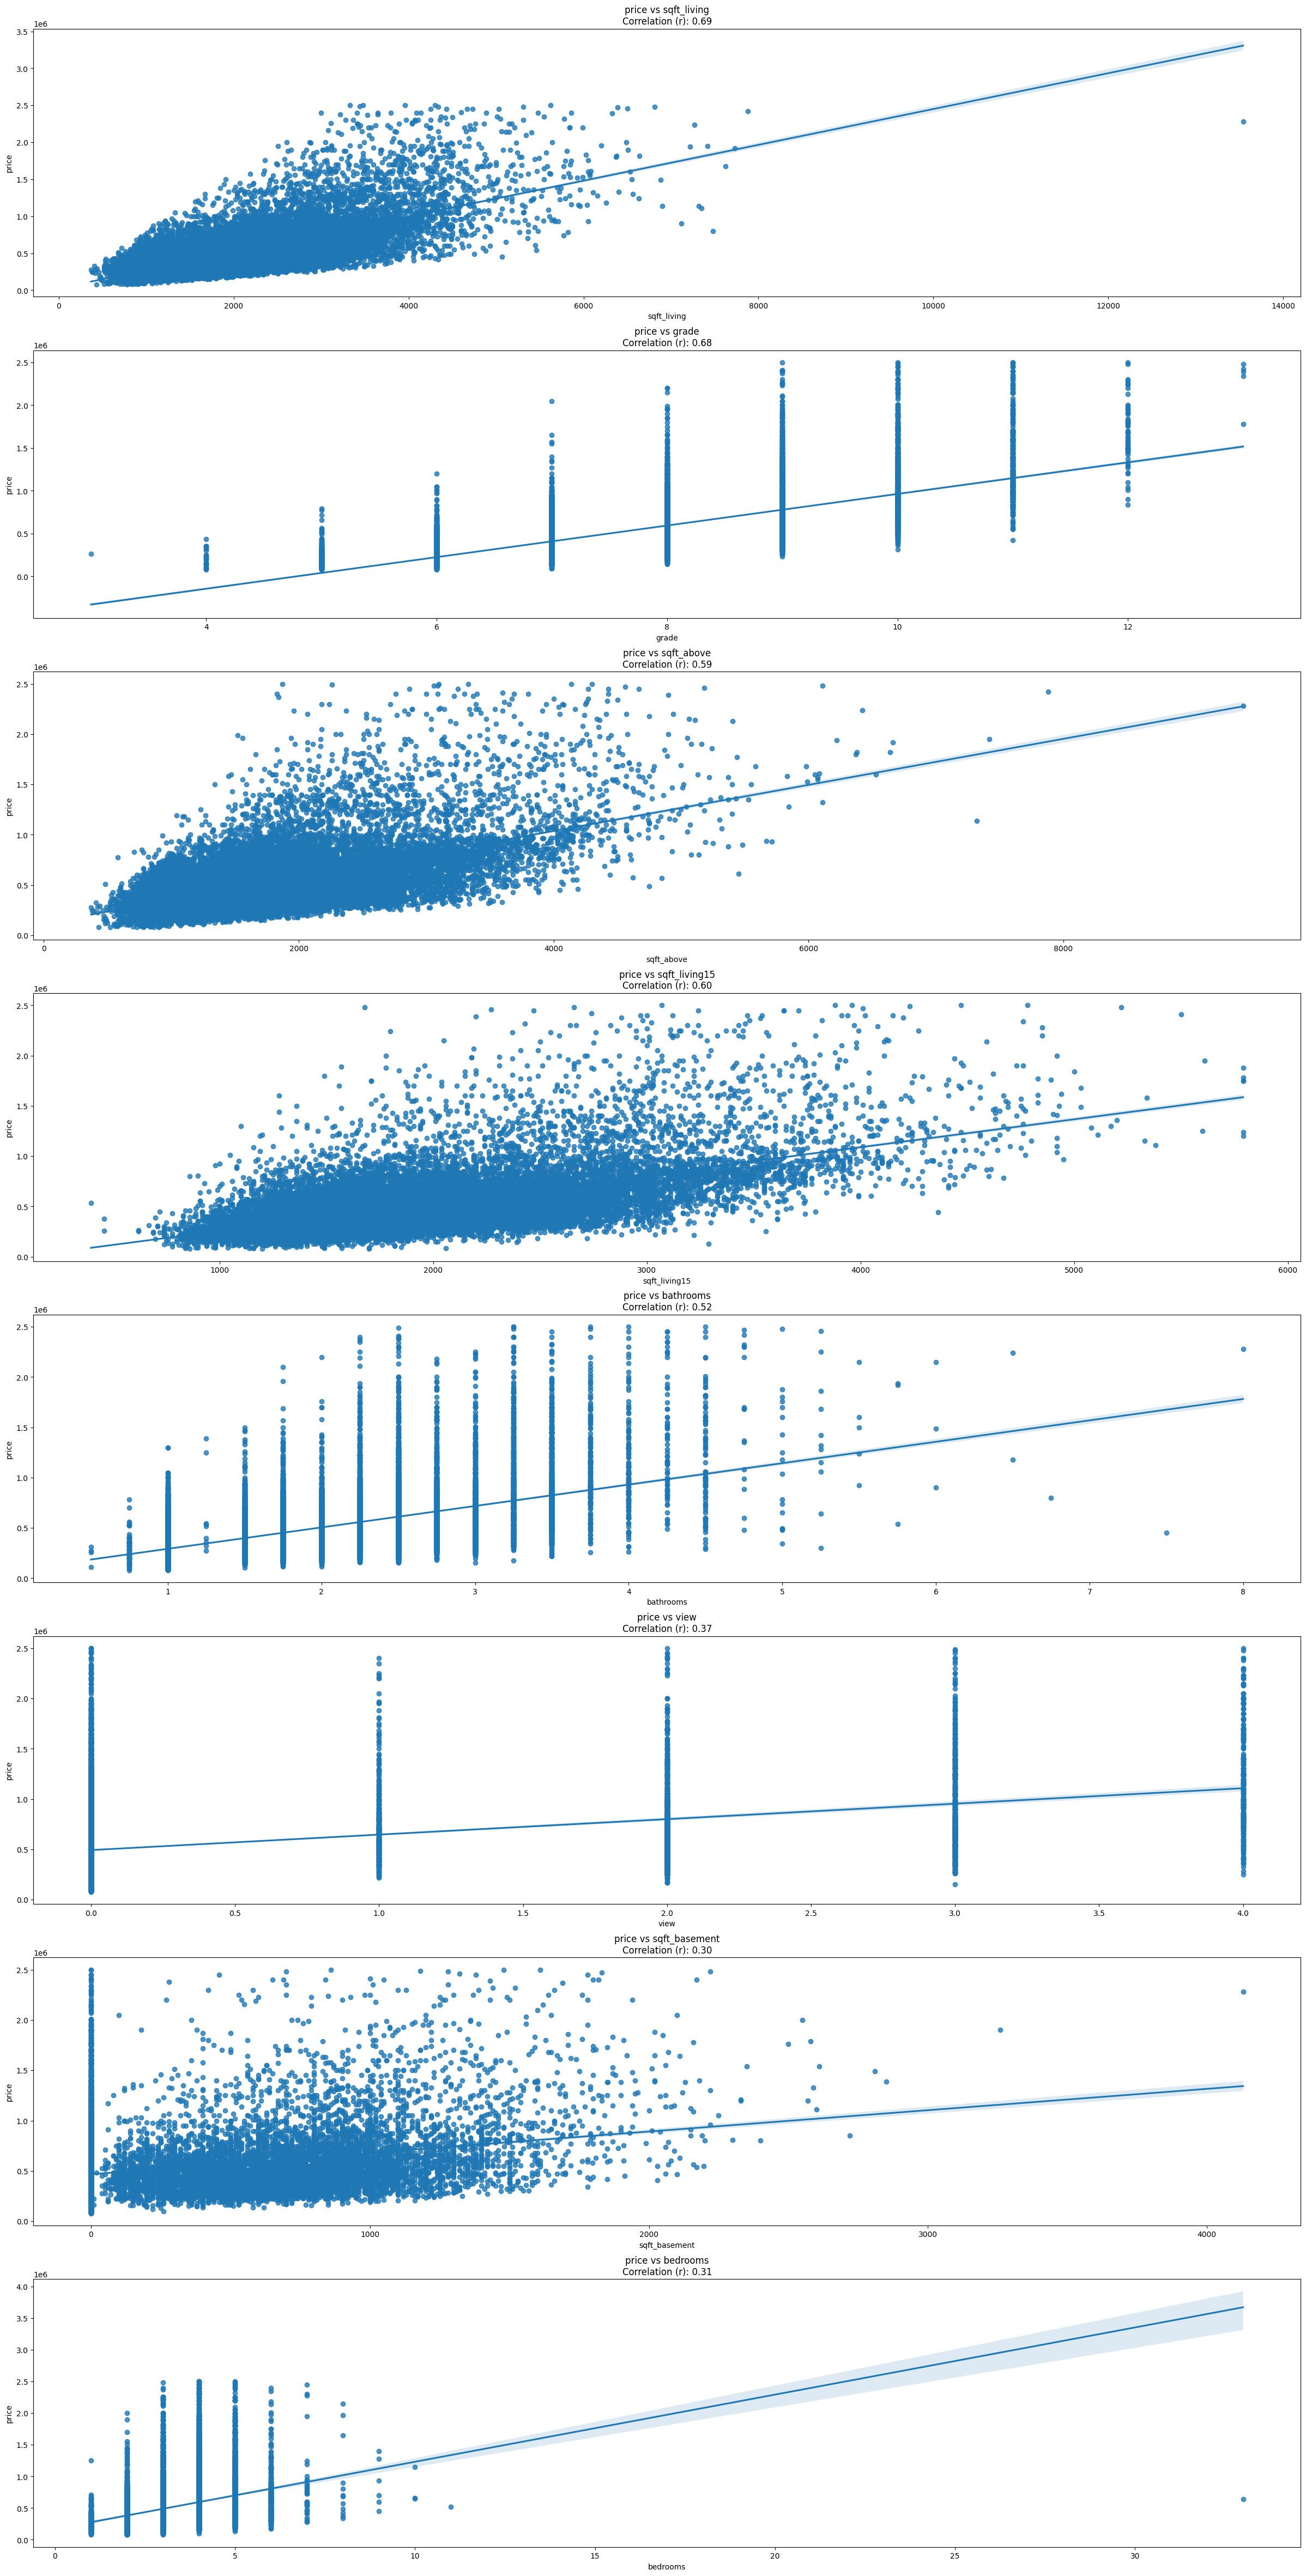

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

fig, axes = plt.subplots(nrows=len(Important_metrics), ncols=1, figsize=(30, 60))

# Variables for regression

# Loop through the variables and plot regression lines
for i, variable in enumerate(Important_metrics):
    sns.regplot(x=variable, y="price", data=df, ax=axes[i])
    
    # Calculate the correlation coefficient (r-value)
    r, _ = stats.pearsonr(df[variable], df["price"])
    
    axes[i].set_title(f'price vs {variable}\nCorrelation (r): {r:.2f}')
    
    # Add x and y-axis labels
    axes[i].set_xlabel(variable)  # Set x-axis label
    axes[i].set_ylabel("price")    # Set y-axis label


# Show the plots
plt.show()

# <span style="font-size:0"></span><div style="padding:1.5rem;color:white;margin:10;font-size:2rem;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#1f89e3"><b><span style='color:#FFFFFF'>4 |</span> Process</b></div> 

In [19]:
# Attributes to drop when we get to training later.
attributes_to_drop = ["id", "date", "zipcode"]

df = df.drop(attributes_to_drop, axis=1)# Finally drop the columns we don't want

df

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,price
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,221900.0
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,538000.0
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,180000.0
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,604000.0
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,510000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,47.6993,-122.346,1530,1509,360000.0
21593,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,47.5107,-122.362,1830,7200,400000.0
21594,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,47.5944,-122.299,1020,2007,402101.0
21595,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,47.5345,-122.069,1410,1287,400000.0


## <b><span style='color:#1f89e3'> 4.1 | </span>Encode</b>

None needed

## <b><span style='color:#1f89e3'> 4.2 | </span>Split</b>

In [20]:
from sklearn.model_selection import train_test_split

# Full Data set
X = df.drop(target_attribute,axis=1)
y = df[target_attribute]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## <b><span style='color:#1f89e3'> 4.3 | </span>Scale</b>


In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# <span style="font-size:0"></span><div style="padding:1.5rem;color:white;margin:10;font-size:2rem;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#1f89e3"><b><span style='color:#FFFFFF'>5 |</span> Model</b></div> 

With all the prep work done, now we can have fun modeling. Which should be easy since we've prepared the data nicely.

## <b><span style='color:#1f89e3'> 5.1 | </span>Design</b>

### <b><span style='color:#1f89e3'>Create</span></b>

In [22]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


# Define a more advanced neural network model
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),  # Dropout for regularization
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),  # Batch normalization for stability
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1)  # Output layer with a single neuron for regression
])

# Compile the model with custom optimizer and learning rate
# custom_optimizer = Adam(learning_rate=0.001)
model.compile(optimizer="adam", loss='mean_squared_error', metrics=['mae'])

# Use callbacks for early stopping and model checkpointing
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

### <b><span style='color:#1f89e3'>Train</span></b>

In [23]:
# Display the model architecture
model.summary()

# Train the model with more epochs and batch size
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=2
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               2304      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                        

## <b><span style='color:#1f89e3'> 5.2 | </span>Evaluate</b>

<Axes: >

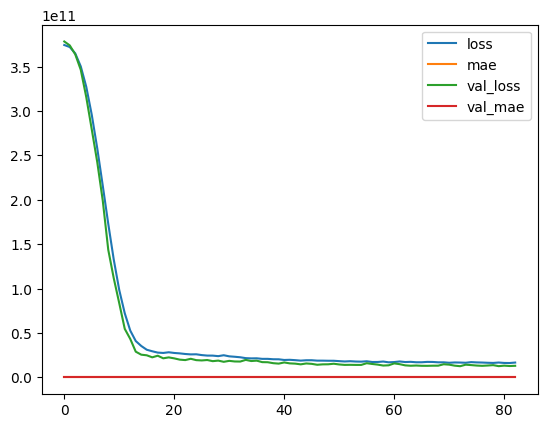

In [24]:
losses = pd.DataFrame(model.history.history)
losses.plot()

### <b><span style='color:#1f89e3'>Error Metrics</span></b>

In [25]:
from sklearn.metrics import mean_squared_error, explained_variance_score

# Generate predictions using your model
predictions = model.predict(X_test)

# Calculate and format the root mean squared error
rmse = np.sqrt(mean_squared_error(y_test, predictions))
error_variance = f"${rmse:,.2f}"

# Calculate and format the explained variance
v_score = explained_variance_score(y_test, predictions)
explained_variance = f"{v_score * 100:.2f}%"

# Print the results
print(f"Explained Variance: {explained_variance}")
print(f"Root Mean Squared Error: {error_variance}")


135/135 [==============================] - 0s 710us/step
Explained Variance: 87.65%
Root Mean Squared Error: $110,332.99
